<a href="https://colab.research.google.com/github/Nchofon/Data-Inference-Applied-Machine-Learning/blob/main/MLHW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

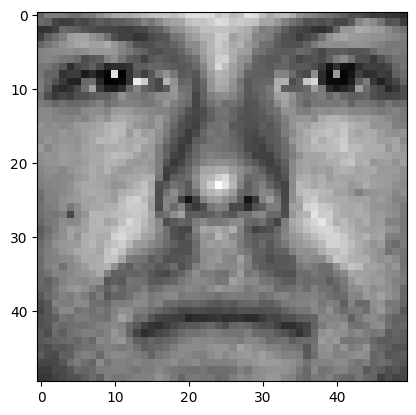

Person ID: 1
Subset ID: 1


In [ ]:
%pip install -q scipy numpy
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np

def pca_fun(input_data, target_d):
  flattened_data = np.array([img.flatten() for img in input_data])

  mean_vector = np.mean(flattened_data, axis=0)
  centered_data = flattened_data - mean_vector
  covariance_matrix = np.cov(centered_data, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvectors = eigenvectors[:, sorted_indices]
  top_eigenvectors = eigenvectors[:, :target_d]

  return top_eigenvectors


### Data loading and plotting the image ###
data = loadmat('/content/drive/MyDrive/ML HW5/face_data.mat')
image = data['image'][0]
person_id = data['personID'][0]
subset_id = data['subsetID'][0]

plt.imshow(image[0], cmap='gray')
plt.show()
print(f'Person ID: {person_id[0]}')
print(f'Subset ID: {subset_id[0]}')


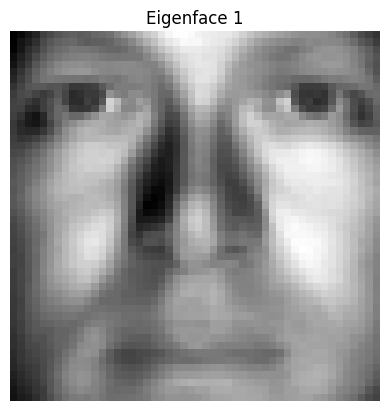

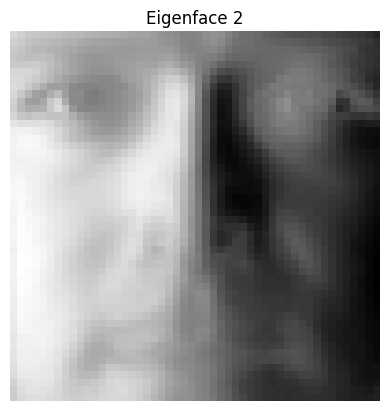

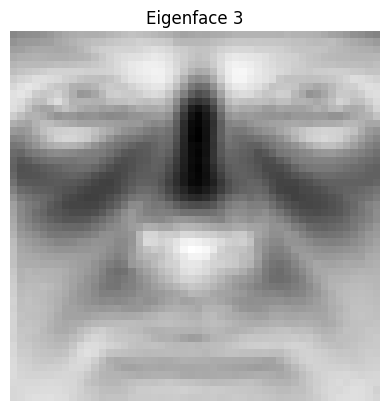

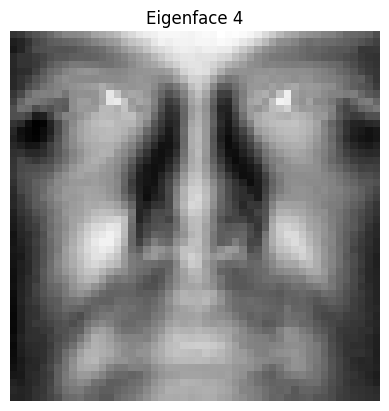

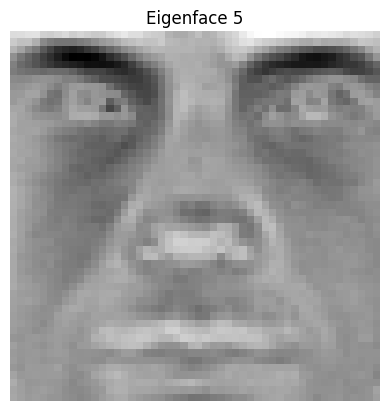

In [ ]:
X = np.array([img.flatten() for img in image])

eigenfaces = pca_fun(X, target_d=200)

for i in range(5):
    face = eigenfaces[:, i].reshape((50, 50))
    plt.imshow(face, cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
    plt.show()

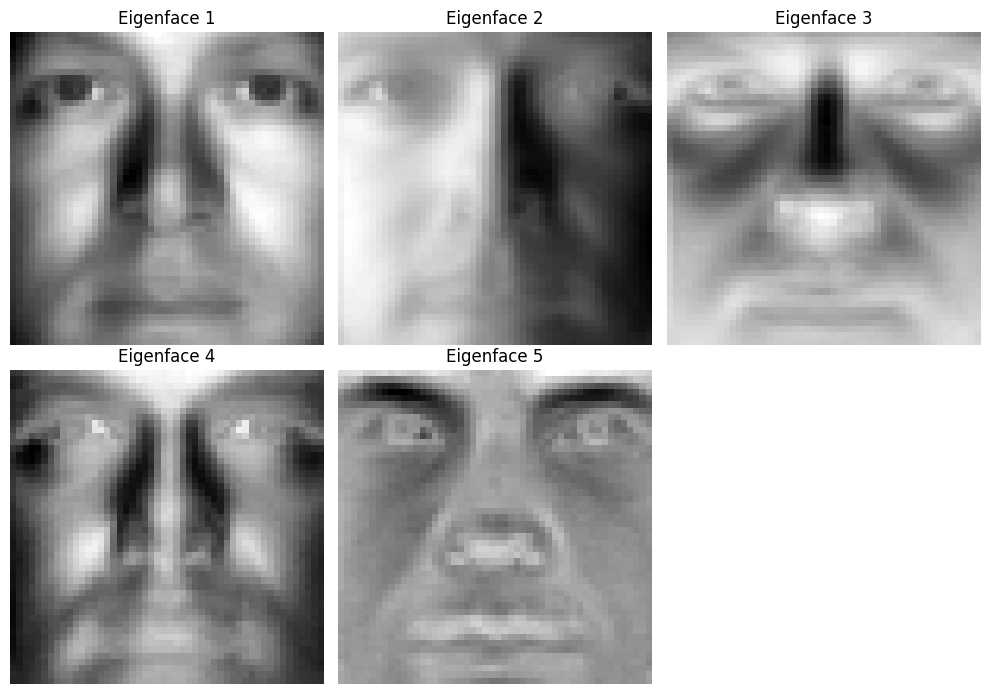

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i in range(5):
    face = eigenfaces[:, i].reshape((50, 50))
    ax = axes[i // 3, i % 3]
    ax.imshow(face, cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
    ax.axis('off')

axes[1,2].axis('off')

plt.tight_layout()
plt.show()